In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

In [3]:
df = pd.read_csv('/content/portfolio_data.csv')

In [4]:
df.head(15)

,Date,AMZN,DPZ,BTC,NFLX
0,5/1/2013,248.229996,51.190983,106.250000,30.415714
1,5/2/2013,252.550003,51.987320,98.099998,30.641428
2,5/3/2013,258.049988,52.446388,112.900002,30.492857
3,5/6/2013,255.720001,53.205257,109.599998,30.098572
4,5/7/2013,257.730011,54.151505,113.199997,29.464285
5,5/8/2013,258.679993,54.385727,112.800003,29.801428
6,5/9/2013,260.160004,54.020340,117.699997,30.915714
7,5/10/2013,263.630005,54.357620,115.639999,31.098572
8,5/13/2013,264.510010,54.573097,111.400002,32.768570
9,5/14/2013,268.329987,55.275757,114.220001,33.424286


In [5]:
df.tail(15)

,Date,AMZN,DPZ,BTC,NFLX
1505,4/24/2019,1901.750000,283.420013,5162.669922,374.230011
1506,4/25/2019,1902.250000,276.450012,5234.089844,368.329987
1507,4/26/2019,1950.630005,273.429993,5229.479980,374.850006
1508,4/29/2019,1938.430054,268.869995,5350.640137,371.829987
1509,4/30/2019,1926.520020,270.579987,5389.540039,370.540009
1510,5/1/2019,1911.520020,271.459991,5500.720215,378.809998
1511,5/2/2019,1900.819946,274.320007,5753.379883,379.059998
1512,5/3/2019,1962.459961,279.750000,5840.080078,385.029999
1513,5/6/2019,1950.550049,282.019989,5819.569824,378.670013
1514,5/7/2019,1921.000000,277.390015,5998.709961,370.459991


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1520 non-null   object 
 1   AMZN    1520 non-null   float64
 2   DPZ     1520 non-null   float64
 3   BTC     1520 non-null   float64
 4   NFLX    1520 non-null   float64
dtypes: float64(4), object(1)
memory usage: 59.5+ KB


In [7]:
df.describe()

,AMZN,DPZ,BTC,NFLX
count,1520.000000,1520.000000,1520.000000,1520.000000
mean,821.541810,146.771695,2421.465669,147.668273
std,518.442653,72.192287,3310.894199,107.641486
min,248.229996,51.190983,69.660004,29.464285
25%,364.360001,84.993593,340.904999,62.851071
50%,686.459992,127.168053,625.304993,104.000000
75%,1121.287536,202.454994,3874.912415,192.207496
max,2039.510010,298.635986,18972.320310,418.970001


In [8]:
df.shape

(1520, 5)

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

## Exploratory Data analysis (EDA):

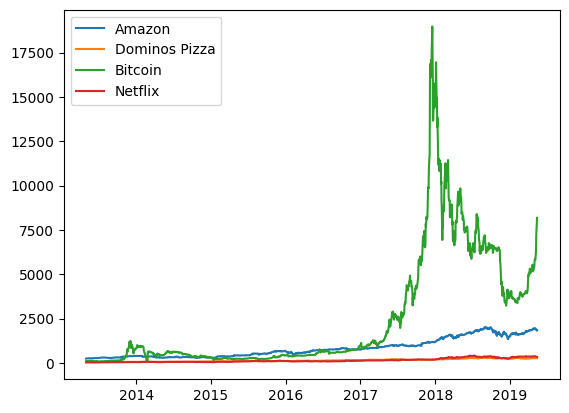

In [10]:
plt.plot(df['Date'], df['AMZN'], label='Amazon')
plt.plot(df['Date'], df['DPZ'], label='Dominos Pizza')
plt.plot(df['Date'], df['BTC'], label='Bitcoin')
plt.plot(df['Date'], df['NFLX'], label='Netflix')
plt.legend()
plt.show()

In [11]:
for column in ['AMZN','DPZ','BTC','NFLX']:
  result = seasonal_decompose(df[column], model='multiplicative',period=30)

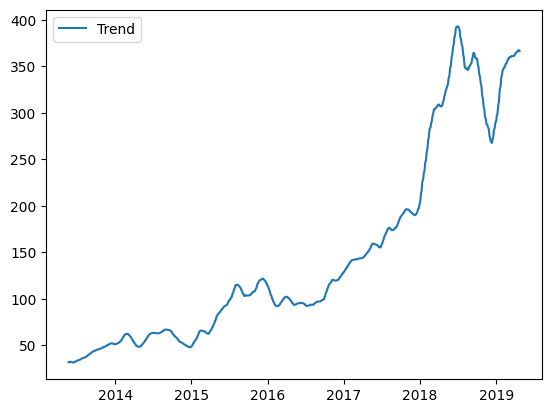

In [12]:
plt.plot(df['Date'],result.trend,label='Trend')
plt.legend()
plt.show()

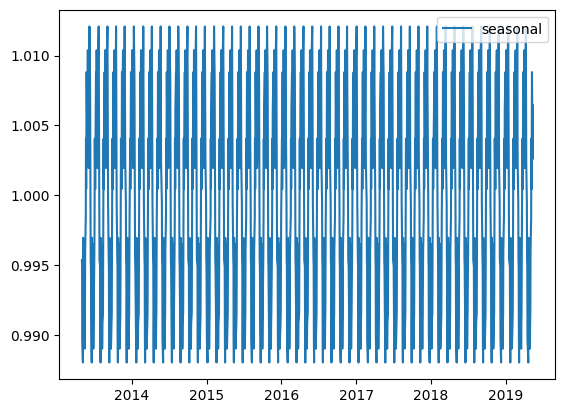

In [13]:
plt.plot(df['Date'],result.seasonal,label='seasonal')
plt.legend()
plt.show()

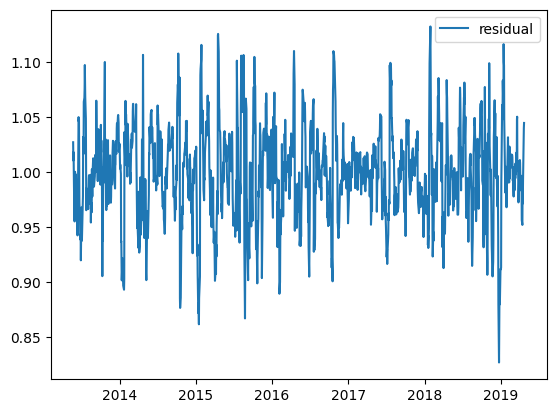

In [14]:
plt.plot(df['Date'],result.resid,label='residual')
plt.legend()
plt.show()

In [15]:
for column in ['AMZN','DPZ','BTC','NFLX']:
  model = ARIMA(df[column])
  model_fit = model.fit()
print(f"summary for {column}:")
print(model_fit.summary())
print("\n\n")

summary for NFLX:
                               SARIMAX Results                                
Dep. Variable:                   NFLX   No. Observations:                 1520
Model:                          ARIMA   Log Likelihood               -9268.072
Date:                Fri, 31 May 2024   AIC                          18540.144
Time:                        11:46:13   BIC                          18550.797
Sample:                             0   HQIC                         18544.110
                               - 1520                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        147.6683      4.417     33.434      0.000     139.012     156.325
sigma2      1.159e+04    737.285     15.717      0.000    1.01e+04     1.3e+04
Ljung-Box (L1) (Q):               

In [16]:
forecast_result={}
for column in ['AMZN','DPZ','BTC','NFLX']:
  model = ARIMA(df[column])
  model_fit = model.fit()
  forecast = model_fit.forecast(steps=30)
  forecast_result[column]=forecast

In [17]:
nRowsRead = 1000
df1 = pd.read_csv('/content/portfolio_data.csv',delimiter=',',nrows=nRowsRead)
df1.dataframeName = 'portfolio_data.csv'
nRow,nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 5 columns


In [18]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
   nunique = df.nunique()
   df = df[[col for col in df if nunique[col]>1 and nunique[col] <50]]
   nRow, nCol = df.shape
   columnNames = list(df)
   nGraphRow = (nCol + nGraphPerRow - 1)/nGraphPerRow
   plt.figure(num=None,figsize=(6*nGraphPerRow, 8*nGraphRow), dpi=80, facecolor='w', edgecolor='k')
   for i in range(min(nCol, nGraphShown)):
      plt.subplot(nGraphRow, nGraphPerRow,i+1)
      columnDf=df.iloc[:,i]
      if(not np.issubdtype(type(columnDf.iloc[0]),np.number)):
          valueCounts = columnDf.value_counts()
          valueCounts.plot.bar()
      else:
          columnDf.hist()
      plt.ylabel('counts')
      plt.xticks(rotation=90)
      plt.title(f'{columnNames[i]}(column[i])')
plt.tight_layout(pad=1.0,w_pad=1.0,h_pad=1.0)
plt.show()

<Figure size 640x480 with 0 Axes>

In [19]:
plotPerColumnDistribution(df1, 10,5)

<Figure size 2400x512 with 0 Axes>

In [20]:

def plotCorrelationMatrix(df,graphWidth):
  filename=df.dataframeName
  df=df.dropna()
  df=df[[col for col in df if df[col].unique()>1]]
  if df.shape [1]<2:
    print(f"No correlation plots shown: The number of non-NaN or constant columns({df.shape[1]})is less than 2")
    return
  corr=df.corr()
  plt.figure(num=None, figsize=(graphWidth, graphWidth),dpi=80, facecolor='w',edgecolor='k')
  corrMat=plt.matShow(corr,fignum=1)
  plt.xticks(range(len(corr.columns)),corr.columns,rotation=90)
  plt.yticks(range(len(corr.columns)),corr.columns)
  plt.gca().xaxis.tick_bottom()
  plt.colorbar(corrMat)
  plt.title(f'Correlation matrix for{filename}',fontsize=15)
  plt.show()

In [21]:
def plotScatterMatrix(df, plotSize,textSize):
  df=df.select_dtypes(include=[np.number])
  # Remove rows and columns that would lead to df being singular
  df = df.dropna()
  df = df[[col for col in df if df[col].nunique()>1]]
  columnNames=list(df)
  if len(columnNames)>10:
    columnNames = columnNames[:10]
  df=df[columnNames]
  ax=pd.plotting.scatter_matrix(df,alpha=0.75,figsize=[plotSize,plotSize],diagonal='kde')
  corrs=df.corr().values
  for i,j in zip(*plt.np.triu_indices_from(ax,k=1)):
    ax[i,j].annotate('Corr.coef=%.3f' % corrs[i,j],{0.8,0.2},xycoords='axes fraction',ha='center',va='center',size=textSize)
  plt.suptitle('scatter and density plot')
  plt.show()

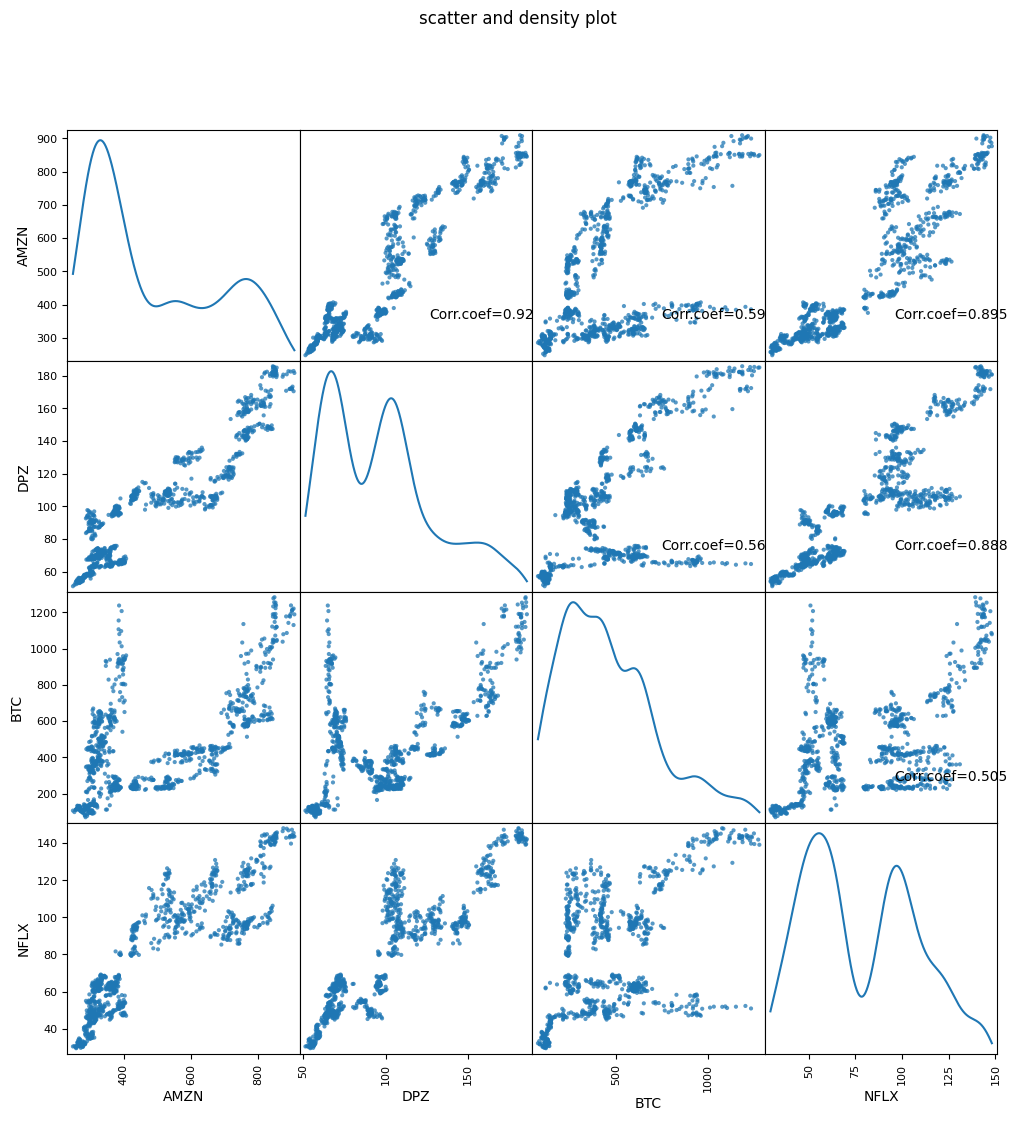

In [22]:
plotScatterMatrix(df1, 12, 10)

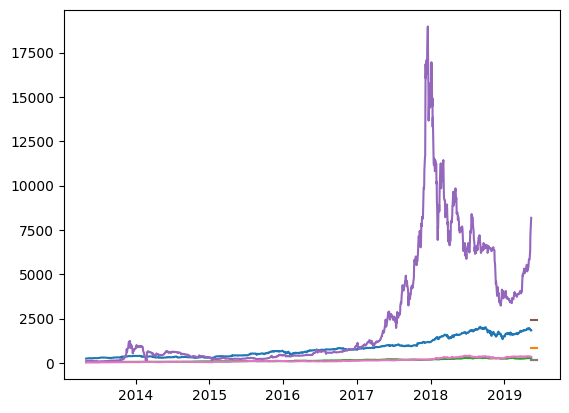

In [23]:
for column, forecast in forecast_result.items():
  plt.plot(df['Date'],df[column], label=f'actual{column}prices')
  plt.plot(pd.date_range(start=df['Date'].iloc[-1],periods=30, freq='D'),forecast, label=f'Forecasted{column}Prices')


<Figure size 640x480 with 0 Axes>

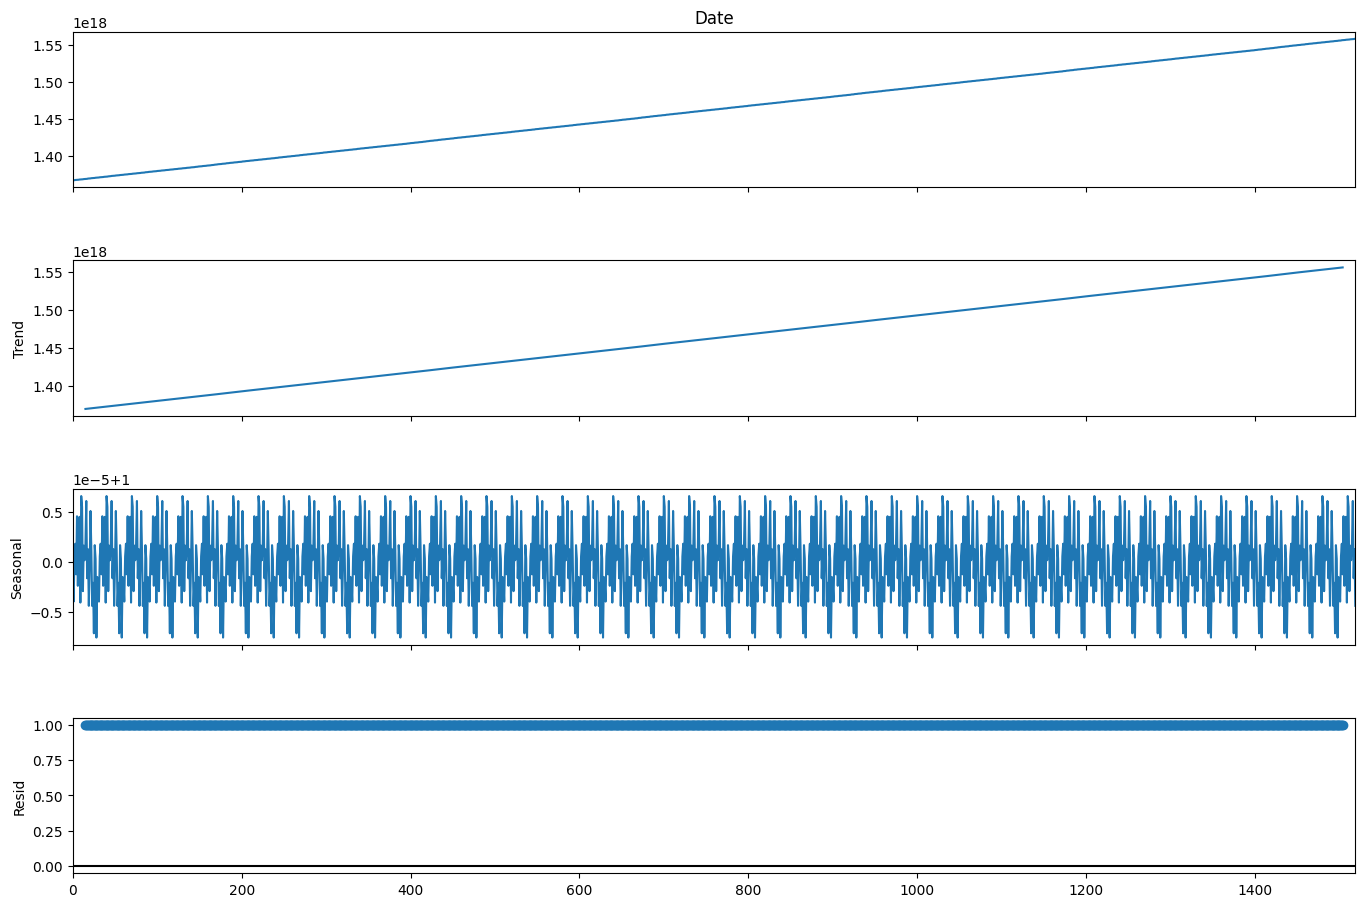

In [24]:
result = seasonal_decompose(df['Date'], model='multiplicative', period=30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 10)